In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/Marouane/Desktop/Master_DSBD/S3/DEEP LEARNING/tps/Traffic signs CNN')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\Marouane\\Desktop\\Master_DSBD\\S3\\DEEP LEARNING\\tps\\Traffic signs CNN'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [7]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

In [8]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
data.shape, labels.shape

((39209, 30, 30, 3), (39209,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 94s 95ms/step - loss: 1.9558 - accuracy: 0.5007 - val_loss: 0.4787 - val_accuracy: 0.8907
Epoch 2/20
981/981 [==============================] - 102s 104ms/step - loss: 0.7051 - accuracy: 0.7896 - val_loss: 0.2856 - val_accuracy: 0.9352
Epoch 3/20
981/981 [==============================] - 108s 110ms/step - loss: 0.4406 - accuracy: 0.8688 - val_loss: 0.1551 - val_accuracy: 0.9589
Epoch 4/20
981/981 [==============================] - 96s 98ms/step - loss: 0.3283 - accuracy: 0.9058 - val_loss: 0.1406 - val_accuracy: 0.9610
Epoch 5/20
981/981 [==============================] - 100s 102ms/step - loss: 0.2904 - accuracy: 0.9161 - val_loss: 0.1046 - val_accuracy: 0.9699
Epoch 6/20
981/981 [==============================] - 97s 99ms/step - loss: 0.2720 - accuracy: 0.9218 - val_loss: 0.0648 - val_accuracy: 0.9838
Epoch 7/20
981/981 [==============================] - 97s 99ms/step - loss: 0.2470 - accuracy: 0.9316 - val_loss: 0.1073 - val_acc

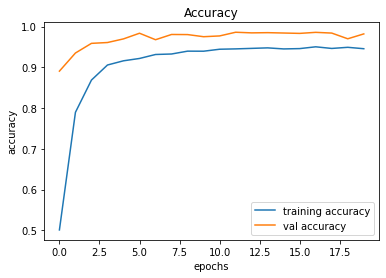

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

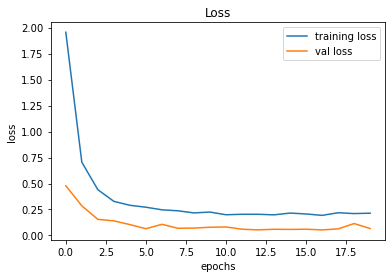

In [17]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [19]:
X_test, label = testing('Test.csv')

In [20]:
X_test

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        

In [21]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 8s 21ms/step


array([[0.0000000e+00, 1.8919110e-32, 0.0000000e+00, ..., 4.4791149e-27,
        8.7124074e-32, 4.8704363e-37],
       [1.9711954e-34, 1.0000000e+00, 8.8695544e-23, ..., 1.7957629e-38,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.4086842e-06, 3.4842175e-03, 1.7375483e-03, ..., 6.6383020e-04,
        1.4443339e-03, 1.2279238e-03],
       [6.8066153e-10, 5.1548750e-06, 1.9166112e-07, ..., 5.6347621e-10,
        2.2911703e-20, 9.5049963e-15],
       [2.4374481e-14, 4.9286564e-07, 1.0831685e-05, ..., 5.5658900e-09,
        2.5750352e-16, 6.0870619e-08]], dtype=float32)

In [22]:
from sklearn.metrics import accuracy_score
#accuracy_score(label, Y_pred)

In [28]:
model.save("./model/TSR.h5")

In [24]:
import os
os.chdir(r'C:\Users\Marouane\Desktop\Master_DSBD\S3\DEEP LEARNING\tps\Traffic signs CNN')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [25]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    classes = np.argmax(Y_pred, axis=1)
    return image,classes

1/1 [==============================] - 0s 83ms/step
Predicted traffic sign is:  Bumpy road


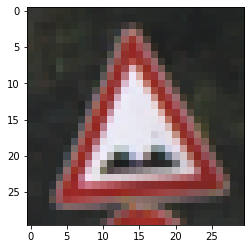

In [27]:
plot,prediction = test_on_img(r'C:\Users\Marouane\Desktop\Master_DSBD\S3\DEEP LEARNING\tps\Traffic signs CNN\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()